In [ ]:
!pip install Sastrawi
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 81.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 95.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 14.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you

In [ ]:
!pip install --upgrade gensim
!pip install --force-reinstall numpy==1.23.5

  Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.3 kB)
Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
chex 0.1.89 requires numpy>=1.24.1, but you have numpy 1.23.5 which is incompatible.
pymc 5.22.0 requires numpy>=1.25.0, but you have numpy 1.23.5 which is incompatible.
scikit-image 0.25.2 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
xarray 2025.3.1 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1

In [ ]:
!pip install numpy==1.23.5

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Import pustaka NLP dan preprocessing
import re
import string  # <-- Tambahkan di sini
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('indonesian'))

# Pustaka machine learning
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
from gensim.models import Word2Vec, FastText

# Inisialisasi stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7bbbeb6e7d80>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1187, in _make_controller_from_path
    lib_controller = controller_class(
                     ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/cty

DATA COLLECTION

In [ ]:
df = pd.read_csv('/content/PRDECT-ID Dataset.csv')
text = df['Customer Review']
labels = df['Emotion']

# Display the first few rows of the dataset
df.head()

,Category,Product Name,Location,Price,Overall Rating,Number Sold,Total Review,Customer Rating,Customer Review,Sentiment,Emotion
0,Computers and Laptops,Wireless Keyboard i8 Mini TouchPad Mouse 2.4G ...,Jakarta Utara,53500,4.9,5449,2369,5,Alhamdulillah berfungsi dengan baik. Packaging...,Positive,Happy
1,Computers and Laptops,PAKET LISENSI WINDOWS 10 PRO DAN OFFICE 2019 O...,Kota Tangerang Selatan,72000,4.9,2359,1044,5,"barang bagus dan respon cepat, harga bersaing ...",Positive,Happy
2,Computers and Laptops,SSD Midasforce 128 Gb - Tanpa Caddy,Jakarta Barat,213000,5.0,12300,3573,5,"barang bagus, berfungsi dengan baik, seler ram...",Positive,Happy
3,Computers and Laptops,ADAPTOR CHARGER MONITOR LCD LED TV LG merek LG...,Jakarta Timur,55000,4.7,2030,672,5,bagus sesuai harapan penjual nya juga ramah. t...,Positive,Happy
4,Computers and Laptops,ADAPTOR CHARGER MONITOR LCD LED TV LG merek LG...,Jakarta Timur,55000,4.7,2030,672,5,"Barang Bagus, pengemasan Aman, dapat Berfungsi...",Positive,Happy


PREPROCESSING DATA

In [ ]:
# Cek missing value
print("\n=== Cek Missing Value ===")
print(df.isnull().sum())

# Cek duplikat
print("\n=== Cek Duplikat ===")
print(f"Jumlah duplikat: {df.duplicated().sum()}")

# hapus missing value dan duplikat jika ada
df = df.dropna()
df = df.drop_duplicates()

print(f"Setelah dibersihkan: {df.shape[0]} baris data")


=== Cek Missing Value ===
Category           0
Product Name       0
Location           0
Price              0
Overall Rating     0
Number Sold        0
Total Review       0
Customer Rating    0
Customer Review    0
Sentiment          0
Emotion            0
dtype: int64

=== Cek Duplikat ===
Jumlah duplikat: 7
Setelah dibersihkan: 5393 baris data


In [ ]:
import pandas as pd
import re
import string

# Coba impor emoji, install jika belum tersedia
try:
    import emoji
except ImportError:
    import pip
    pip.main(['install', 'emoji'])
    import emoji

# Membaca file dataset
df = pd.read_csv('/content/PRDECT-ID Dataset.csv')

# Ambil kolom teks dan label
text = df['Customer Review'].astype(str)
labels = df['Emotion']

# Stopwords Bahasa Indonesia
stop_words_id = set([
    'yang', 'dan', 'di', 'dari', 'ke', 'untuk', 'dengan', 'pada', 'ya', 'ini', 'itu',
    'ada', 'oleh', 'saat', 'juga', 'seperti', 'karena', 'tidak', 'akan', 'dalam'
])

# Kamus singkatan dan informal
normalization_dict = {
    'gak': 'tidak', 'ga': 'tidak', 'gmn': 'bagaimana', 'bgt': 'banget',
    'dong': 'saja', 'knp': 'kenapa', 'krn': 'karena', 'tp': 'tapi',
    'dr': 'dari', 'yg': 'yang', 'aja': 'saja', 'blm': 'belum', 'jd': 'jadi',
    'dlm': 'dalam', 'sm': 'sama', 'sbg': 'sebagai', 'tks': 'terima kasih',
    'pls': 'tolong', 'thx': 'terima kasih', 'btw': 'ngomong-ngomong', 'ntar': 'nanti',
    'brb': 'segera kembali', 'ok': 'baik', 'ntn': 'menonton', 'dmn': 'di mana',
    'km': 'kamu', 'qt': 'kita', 'kpn': 'kapan', 'sy': 'saya', 'lg': 'lagi',
    'gw': 'saya', 'gue': 'saya', 'lu': 'kamu', 'lo': 'kamu', 'pd': 'pada',
    'trs': 'terus', 'udh': 'sudah', 'udah': 'sudah', 'gpp': 'tidak apa-apa',
    'wkwkwk': 'tertawa', 'td': 'tadi', 'ttg': 'tentang', 'pkl': 'praktik kerja lapangan',
    'dll': 'dan lain lain', 'kyk': 'kayak', 'org': 'orang', 'emg': 'emang',
    'kkn': 'kuliah kerja nyata', 'spk': 'satuan pendidikan kerjasama', 'smt': 'semester',
    'ofisial': 'official', 'fc': 'football club', 'prokes': 'program kesehatan',
    'no': 'nomor', 'ptn': 'perguruan tinggi negeri', 'nesa': 'unesa',
    'sasing': 'sastra inggris', 'darjo': 'sidoarjo', 'gbut': 'gabut',
    'stres': 'stress', 'pcr': 'polymerase chain reaction test', 'ikt': 'ikut',
    'jg': 'juga', 'kakak2': 'kakak-kakak', 'aku': 'saya', 'brp': 'berapa',
    'jugs': 'juga', 'muk': 'mau', 'curhat': 'curahan hati'
}

# Kamus bahasa Jawa
normalization_dict_jawa = {
    'ora': 'tidak', 'sakjane': 'sebenarnya', 'aku': 'saya', 'kowe': 'kamu',
    'gawe': 'buat', 'nggih': 'ya', 'opo': 'apa', 'ngendi': 'di mana',
    'wes': 'sudah', 'durung': 'belum', 'yen': 'jika', 'ben': 'biar',
    'ngopo': 'kenapa', 'wong': 'orang', 'sampeyan': 'Anda',
    'mangan': 'makan', 'ngombe': 'minum', 'gede': 'besar'
}

# Fungsi normalisasi teks
def normalize_text(text):
    words = text.split()
    normalized_words = [normalization_dict.get(word, word) for word in words]
    return ' '.join(normalized_words)

def normalize_text_jawa(text):
    words = text.split()
    normalized_words = [normalization_dict_jawa.get(word, word) for word in words]
    return ' '.join(normalized_words)

# Fungsi pembersihan
def convert_emojis(text):
    return emoji.demojize(text)

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

def remove_unwanted_characters(text):
    return re.sub(r'[^\x00-\x7F]+', '', text)

def preprocess_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r"<.*?>", '', text)
    text = re.sub(r'\@[\w]+|\#', '', text)
    text = convert_emojis(text)
    text = normalize_text_jawa(text)
    text = normalize_text(text)
    text = remove_unwanted_characters(text)
    text = remove_punctuation(text)
    word_tokens = text.split()
    filtered_text = [word for word in word_tokens if word not in stop_words_id]
    return ' '.join(filtered_text)

# Terapkan fungsi preprocessing
df['cleaned_text'] = df['Customer Review'].apply(preprocess_text)

# Tokenisasi
tokenized_text = [text.split() for text in df['cleaned_text']]

# Simpan hasil preprocessing ke file baru
df.to_csv('/content/PRDECT-ID_preprocessed.csv', index=False)

# Tampilkan beberapa baris pertama
print(df[['Customer Review', 'cleaned_text']].head())


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Collecting emoji

Downloading emoji-2.14.1-py3-none-any.whl.metadata (5.7 kB)

Downloading emoji-2.14.1-py3-none-any.whl (590 kB)

Output()

Installing collected packages: emoji

Successfully installed emoji-2.14.1

                                     Customer Review  \
0  Alhamdulillah berfungsi dengan baik. Packaging...   
1  barang bagus dan respon cepat, harga bersaing ...   
2  barang bagus, berfungsi dengan baik, seler ram...   
3  bagus sesuai harapan penjual nya juga ramah. t...   
4  Barang Bagus, pengemasan Aman, dapat Berfungsi...   

                                        cleaned_text  
0  alhamdulillah berfungsi baik packaging aman re...  
1      barang bagus respon cepat harga bersaing lain  
2  barang bagus berfungsi baik seler ramah pengir...  
3  bagus sesuai harapan penjual nya ramah trimaka...  
4  barang bagus pengemasan aman dapat berfungsi baik  


EXPLORATORY DATA ANALYSIS (EDA)

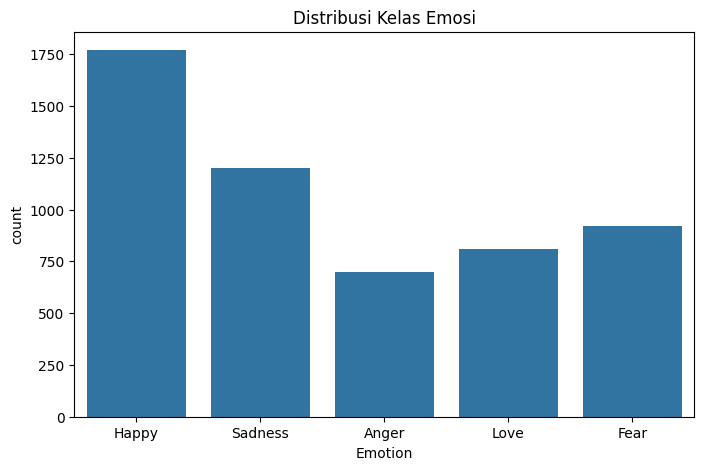

In [ ]:
# Distribusi kelas
plt.figure(figsize=(8,5))
sns.countplot(x='Emotion', data=df)  # Ganti 'label' menjadi 'Emotion'
plt.title("Distribusi Kelas Emosi")
plt.show()

In [ ]:
# Pastikan teks tidak kosong
df = df[df['cleaned_text'].astype(bool)]

# Reset index setelah filter
df = df.reset_index(drop=True)

# Lanjutkan TF-IDF
texts = df['cleaned_text'].astype(str).tolist()
labels = df['Emotion'].tolist()


In [ ]:
import numpy as np
import pickle

# Load teks
texts = df['cleaned_text'].astype(str).tolist()

# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_vectorized = vectorizer.fit_transform(texts)

# Simpan TF-IDF dan vectorizer
with open('X_vectorized.pkl', 'wb') as f:
    pickle.dump(X_vectorized, f)

with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

# Pastikan 'labels' sudah tersedia
print("Distribusi sebelum SMOTE:", Counter(labels))

# Split data (SMOTE hanya pada training set)
X_train, X_test, y_train, y_test = train_test_split(
    X_vectorized, labels, test_size=0.2, random_state=42, stratify=labels
)

# Terapkan SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Simpan hasil SMOTE
with open('X_train_balanced.pkl', 'wb') as f:
    pickle.dump(X_train_balanced, f)
with open('y_train_balanced.pkl', 'wb') as f:
    pickle.dump(y_train_balanced, f)

print("Distribusi sesudah SMOTE:", Counter(y_train_balanced))


Distribusi sebelum SMOTE: Counter({'Happy': 1770, 'Sadness': 1202, 'Fear': 920, 'Love': 809, 'Anger': 699})
Distribusi sesudah SMOTE: Counter({'Love': 1416, 'Happy': 1416, 'Sadness': 1416, 'Anger': 1416, 'Fear': 1416})


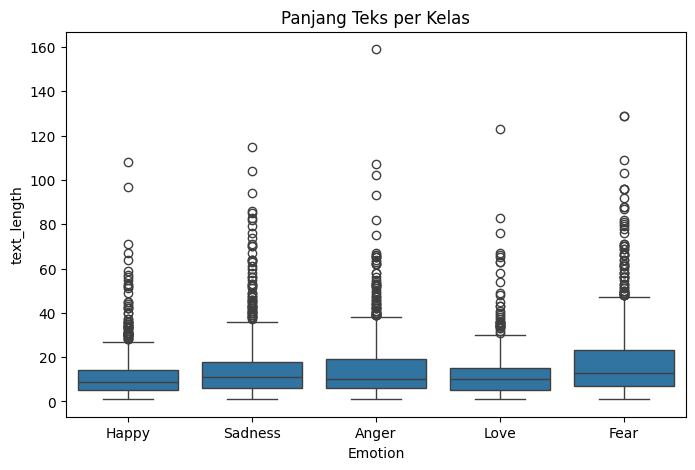

In [ ]:
# Panjang teks
df['text_length'] = df['cleaned_text'].apply(lambda x: len(x.split()))
plt.figure(figsize=(8,5))
sns.boxplot(x='Emotion', y='text_length', data=df)  # Ganti 'label' menjadi 'Emotion'
plt.title("Panjang Teks per Kelas")
plt.show()

In [ ]:
df['text_length'] = df['cleaned_text'].apply(lambda x: len(x.split()))
print(df['text_length'].describe())

count    5400.00000
mean       13.61500
std        12.94165
min         1.00000
25%         6.00000
50%        10.00000
75%        17.00000
max       159.00000
Name: text_length, dtype: float64


In [ ]:
import numpy as np
import pandas as pd

# Asumsikan df sudah tersedia dengan kolom 'cleaned_text'
tokenized_texts = [text.split() for text in df['cleaned_text'].astype(str)]

# Buat kamus kata ke index
word2idx = {'<PAD>': 0, '<OOV>': 1}
for text in tokenized_texts:
    for word in text:
        if word not in word2idx:
            word2idx[word] = len(word2idx)

# Ubah teks jadi angka
sequences = [[word2idx.get(word, 1) for word in text] for text in tokenized_texts]

# Padding/truncating manual
max_len = 137
padded_sequences = np.array([
    seq[:max_len] + [0]*(max_len - len(seq)) if len(seq) < max_len else seq[:max_len]
    for seq in sequences
])

# Simpan hasil padding
np.save('padded_sequences.npy', padded_sequences)

# Simpan word2idx dictionary
import pickle
with open('word2idx.pkl', 'wb') as f:
    pickle.dump(word2idx, f)

print(f"Padding selesai. Shape: {padded_sequences.shape}")


Padding selesai. Shape: (5400, 137)


In [ ]:
# Kata unik per kelas
for label in df['Emotion'].unique():  # Ganti 'labels' menjadi 'Emotion'
    subset = df[df['Emotion'] == label]  # Ganti 'labels' menjadi 'Emotion'
    words = ' '.join(subset['cleaned_text']).split()
    unique_words = set(words)
    print(f"{label}: {len(unique_words)} kata unik")

Happy: 3431 kata unik
Sadness: 3980 kata unik
Anger: 3016 kata unik
Love: 2579 kata unik
Fear: 3911 kata unik


FEATURE EXTRACTION & PCA

In [ ]:
# Tokenisasi untuk Word2Vec & FastText
tokenized_text = [text.split() for text in df['cleaned_text']]

In [ ]:
# TF-IDF
print("\n=== TF-IDF ===")
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(df['cleaned_text'].astype(str))
print(f"Jumlah fitur sebelum PCA (TF-IDF): {X_tfidf.shape[1]}")

# Simpan TF-IDF dan vectorizer
with open('X_tfidf.pkl', 'wb') as f:
    pickle.dump(X_tfidf, f)

with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf_vectorizer, f)

# PCA
pca_tfidf = PCA(n_components=0.95)
X_tfidf_pca = pca_tfidf.fit_transform(X_tfidf.toarray())
print(f"Jumlah fitur setelah PCA (TF-IDF): {X_tfidf_pca.shape[1]}")

# Simpan hasil PCA
np.save('X_tfidf_pca.npy', X_tfidf_pca)
with open('pca_tfidf_model.pkl', 'wb') as f:
    pickle.dump(pca_tfidf, f)



=== TF-IDF ===
Jumlah fitur sebelum PCA (TF-IDF): 5000
Jumlah fitur setelah PCA (TF-IDF): 2120


In [ ]:
# BoW
print("\n=== Bag of Words ===")
bow_vectorizer = CountVectorizer(max_features=5000)
X_bow = bow_vectorizer.fit_transform(df['cleaned_text'].astype(str))
print(f"Jumlah fitur sebelum PCA (BoW): {X_bow.shape[1]}")

# Simpan hasil BoW dan vectorizer
with open('X_bow.pkl', 'wb') as f:
    pickle.dump(X_bow, f)

with open('bow_vectorizer.pkl', 'wb') as f:
    pickle.dump(bow_vectorizer, f)

# PCA
pca_bow = PCA(n_components=0.95)
X_bow_pca = pca_bow.fit_transform(X_bow.toarray())
print(f"Jumlah fitur setelah PCA (BoW): {X_bow_pca.shape[1]}")

# Simpan hasil PCA
np.save('X_bow_pca.npy', X_bow_pca)
with open('pca_bow_model.pkl', 'wb') as f:
    pickle.dump(pca_bow, f)



=== Bag of Words ===
Jumlah fitur sebelum PCA (BoW): 5000
Jumlah fitur setelah PCA (BoW): 1361


In [ ]:
# Word2Vec
print("\n=== Word2Vec ===")
w2v_model = Word2Vec(
    sentences=tokenized_text, vector_size=100, window=5,
    min_count=1, workers=4, sg=1  # sg=1 means skip-gram
)

# Simpan model Word2Vec
w2v_model.save("word2vec_model.model")

# Buat vektor rata-rata untuk tiap dokumen
X_w2v = np.array([
    np.mean(
        [w2v_model.wv[word] for word in words if word in w2v_model.wv]
        or [np.zeros(w2v_model.vector_size)], axis=0
    )
    for words in tokenized_text
])

# Simpan X_w2v
np.save('X_w2v.npy', X_w2v)

# PCA
print(f"Jumlah fitur sebelum PCA (Word2Vec): {X_w2v.shape[1]}")
pca_w2v = PCA(n_components=0.95)
X_w2v_pca = pca_w2v.fit_transform(X_w2v)
print(f"Jumlah fitur setelah PCA (Word2Vec): {X_w2v_pca.shape[1]}")

# Simpan hasil PCA
np.save('X_w2v_pca.npy', X_w2v_pca)
with open('pca_w2v_model.pkl', 'wb') as f:
    pickle.dump(pca_w2v, f)



=== Word2Vec ===


collecting all words and their counts

PROGRESS: at sentence #0, processed 0 words, keeping 0 word types

collected 9945 word types from a corpus of 73521 raw words and 5400 sentences

Creating a fresh vocabulary

Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 9945 unique words (100.00% of original 9945, drops 0)', 'datetime': '2025-05-30T12:46:37.451656', 'gensim': '4.3.3', 'python': '3.11.12 (main, Apr  9 2025, 08:55:54) [GCC 11.4.0]', 'platform': 'Linux-6.1.123+-x86_64-with-glibc2.35', 'event': 'prepare_vocab'}

Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 73521 word corpus (100.00% of original 73521, drops 0)', 'datetime': '2025-05-30T12:46:37.454320', 'gensim': '4.3.3', 'python': '3.11.12 (main, Apr  9 2025, 08:55:54) [GCC 11.4.0]', 'platform': 'Linux-6.1.123+-x86_64-with-glibc2.35', 'event': 'prepare_vocab'}

deleting the raw counts dictionary of 9945 items

sample=0.001 downsamples 56 most-common words

Word2Vec lifecycle event {'msg': 'downsampling leaves estimated 63436.0442458247 word corpus (86.3%% of prior 73521)', 'datetime': '2025-05-30T12:46:37.535465', 'gensim': '4.3.3', 'python': '3.11.12 (main, Apr  9 2025, 08:55:54) [GCC 11.4.0]', 'platform': 'Linux-6.1.123+-x86_64-with-glibc2.35', 'event': 'prepare_vocab'}

estimated required memory for 9945 words and 100 dimensions: 12928500 bytes

resetting layer weights

Word2Vec lifecycle event {'update': False, 'trim_rule': 'None', 'datetime': '2025-05-30T12:46:37.694946', 'gensim': '4.3.3', 'python': '3.11.12 (main, Apr  9 2025, 08:55:54) [GCC 11.4.0]', 'platform': 'Linux-6.1.123+-x86_64-with-glibc2.35', 'event': 'build_vocab'}

Word2Vec lifecycle event {'msg': 'training model with 4 workers on 9945 vocabulary and 100 features, using sg=1 hs=0 sample=0.001 negative=5 window=5 shrink_windows=True', 'datetime': '2025-05-30T12:46:37.697358', 'gensim': '4.3.3', 'python': '3.11.12 (main, Apr  9 2025, 08:55:54) [GCC 11.4.0]', 'platform': 'Linux-6.1.123+-x86_64-with-glibc2.35', 'event': 'train'}

EPOCH 0: training on 73521 raw words (63458 effective words) took 0.5s, 125450 effective words/s

EPOCH 1: training on 73521 raw words (63361 effective words) took 0.5s, 138249 effective words/s

EPOCH 2: training on 73521 raw words (63350 effective words) took 0.5s, 133139 effective words/s

EPOCH 3: training on 73521 raw words (63459 effective words) took 0.5s, 128791 effective words/s

EPOCH 4: training on 73521 raw words (63485 effective words) took 0.5s, 124018 effective words/s

Word2Vec lifecycle event {'msg': 'training on 367605 raw words (317113 effective words) took 2.5s, 126320 effective words/s', 'datetime': '2025-05-30T12:46:40.209785', 'gensim': '4.3.3', 'python': '3.11.12 (main, Apr  9 2025, 08:55:54) [GCC 11.4.0]', 'platform': 'Linux-6.1.123+-x86_64-with-glibc2.35', 'event': 'train'}

Word2Vec lifecycle event {'params': 'Word2Vec<vocab=9945, vector_size=100, alpha=0.025>', 'datetime': '2025-05-30T12:46:40.212556', 'gensim': '4.3.3', 'python': '3.11.12 (main, Apr  9 2025, 08:55:54) [GCC 11.4.0]', 'platform': 'Linux-6.1.123+-x86_64-with-glibc2.35', 'event': 'created'}

Word2Vec lifecycle event {'fname_or_handle': 'word2vec_model.model', 'separately': 'None', 'sep_limit': 10485760, 'ignore': frozenset(), 'datetime': '2025-05-30T12:46:40.214627', 'gensim': '4.3.3', 'python': '3.11.12 (main, Apr  9 2025, 08:55:54) [GCC 11.4.0]', 'platform': 'Linux-6.1.123+-x86_64-with-glibc2.35', 'event': 'saving'}

not storing attribute cum_table

saved word2vec_model.model

Jumlah fitur sebelum PCA (Word2Vec): 100
Jumlah fitur setelah PCA (Word2Vec): 5


In [ ]:
# FastText
print("\n=== FastText ===")
ft_model = FastText(
    sentences=tokenized_text, vector_size=100, window=5,
    min_count=1, workers=4, sg=1  # sg=1 berarti skip-gram
)

# Simpan model FastText
ft_model.save("fasttext_model.model")

# Buat vektor rata-rata untuk setiap dokumen
X_ft = np.array([
    np.mean(
        [ft_model.wv[word] for word in words if word in ft_model.wv]
        or [np.zeros(ft_model.vector_size)], axis=0
    )
    for words in tokenized_text
])

# Simpan vektor FastText
np.save('X_fasttext.npy', X_ft)

# PCA
print(f"Jumlah fitur sebelum PCA (FastText): {X_ft.shape[1]}")
pca_ft = PCA(n_components=0.95)
X_ft_pca = pca_ft.fit_transform(X_ft)
print(f"Jumlah fitur setelah PCA (FastText): {X_ft_pca.shape[1]}")

# Simpan hasil PCA
np.save('X_fasttext_pca.npy', X_ft_pca)
with open('pca_fasttext_model.pkl', 'wb') as f:
    pickle.dump(pca_ft, f)



=== FastText ===


collecting all words and their counts

PROGRESS: at sentence #0, processed 0 words, keeping 0 word types

collected 9945 word types from a corpus of 73521 raw words and 5400 sentences

Creating a fresh vocabulary

FastText lifecycle event {'msg': 'effective_min_count=1 retains 9945 unique words (100.00% of original 9945, drops 0)', 'datetime': '2025-05-30T12:46:52.925561', 'gensim': '4.3.3', 'python': '3.11.12 (main, Apr  9 2025, 08:55:54) [GCC 11.4.0]', 'platform': 'Linux-6.1.123+-x86_64-with-glibc2.35', 'event': 'prepare_vocab'}

FastText lifecycle event {'msg': 'effective_min_count=1 leaves 73521 word corpus (100.00% of original 73521, drops 0)', 'datetime': '2025-05-30T12:46:52.932372', 'gensim': '4.3.3', 'python': '3.11.12 (main, Apr  9 2025, 08:55:54) [GCC 11.4.0]', 'platform': 'Linux-6.1.123+-x86_64-with-glibc2.35', 'event': 'prepare_vocab'}

deleting the raw counts dictionary of 9945 items

sample=0.001 downsamples 56 most-common words

FastText lifecycle event {'msg': 'downsampling leaves estimated 63436.0442458247 word corpus (86.3%% of prior 73521)', 'datetime': '2025-05-30T12:46:53.143887', 'gensim': '4.3.3', 'python': '3.11.12 (main, Apr  9 2025, 08:55:54) [GCC 11.4.0]', 'platform': 'Linux-6.1.123+-x86_64-with-glibc2.35', 'event': 'prepare_vocab'}

estimated required memory for 9945 words, 2000000 buckets and 100 dimensions: 814824372 bytes

resetting layer weights

FastText lifecycle event {'update': False, 'trim_rule': 'None', 'datetime': '2025-05-30T12:46:58.121162', 'gensim': '4.3.3', 'python': '3.11.12 (main, Apr  9 2025, 08:55:54) [GCC 11.4.0]', 'platform': 'Linux-6.1.123+-x86_64-with-glibc2.35', 'event': 'build_vocab'}

FastText lifecycle event {'msg': 'training model with 4 workers on 9945 vocabulary and 100 features, using sg=1 hs=0 sample=0.001 negative=5 window=5 shrink_windows=True', 'datetime': '2025-05-30T12:46:58.123810', 'gensim': '4.3.3', 'python': '3.11.12 (main, Apr  9 2025, 08:55:54) [GCC 11.4.0]', 'platform': 'Linux-6.1.123+-x86_64-with-glibc2.35', 'event': 'train'}

EPOCH 0: training on 73521 raw words (63347 effective words) took 1.0s, 65904 effective words/s

EPOCH 1: training on 73521 raw words (63560 effective words) took 1.0s, 64158 effective words/s

EPOCH 2 - PROGRESS: at 76.13% examples, 36942 words/s, in_qsize 2, out_qsize 1

EPOCH 2: training on 73521 raw words (63557 effective words) took 1.3s, 49835 effective words/s

EPOCH 3: training on 73521 raw words (63325 effective words) took 1.0s, 65105 effective words/s

EPOCH 4: training on 73521 raw words (63411 effective words) took 0.9s, 72981 effective words/s

FastText lifecycle event {'msg': 'training on 367605 raw words (317200 effective words) took 5.2s, 61004 effective words/s', 'datetime': '2025-05-30T12:47:03.327690', 'gensim': '4.3.3', 'python': '3.11.12 (main, Apr  9 2025, 08:55:54) [GCC 11.4.0]', 'platform': 'Linux-6.1.123+-x86_64-with-glibc2.35', 'event': 'train'}

FastText lifecycle event {'params': 'FastText<vocab=9945, vector_size=100, alpha=0.025>', 'datetime': '2025-05-30T12:47:04.198781', 'gensim': '4.3.3', 'python': '3.11.12 (main, Apr  9 2025, 08:55:54) [GCC 11.4.0]', 'platform': 'Linux-6.1.123+-x86_64-with-glibc2.35', 'event': 'created'}

FastText lifecycle event {'fname_or_handle': 'fasttext_model.model', 'separately': 'None', 'sep_limit': 10485760, 'ignore': frozenset(), 'datetime': '2025-05-30T12:47:04.204483', 'gensim': '4.3.3', 'python': '3.11.12 (main, Apr  9 2025, 08:55:54) [GCC 11.4.0]', 'platform': 'Linux-6.1.123+-x86_64-with-glibc2.35', 'event': 'saving'}

storing np array 'vectors_ngrams' to fasttext_model.model.wv.vectors_ngrams.npy

not storing attribute buckets_word

not storing attribute vectors

not storing attribute cum_table

saved fasttext_model.model

Jumlah fitur sebelum PCA (FastText): 100
Jumlah fitur setelah PCA (FastText): 5


In [ ]:
import numpy as np

# Load hasil PCA dari masing-masing metode
X_tfidf_pca = np.load('X_tfidf_pca.npy')
X_bow_pca = np.load('X_bow_pca.npy')
X_w2v_pca = np.load('X_w2v_pca.npy')
X_ft_pca = np.load('X_fasttext_pca.npy')

# Gabungkan semua fitur menjadi satu matriks
X_combined = np.concatenate([X_tfidf_pca, X_bow_pca, X_w2v_pca, X_ft_pca], axis=1)

# Tampilkan informasi dimensi
print(f"Jumlah total fitur gabungan: {X_combined.shape[1]}")

# Simpan fitur gabungan
np.save('X_combined_features.npy', X_combined)

import pickle

with open('X_combined_features.pkl', 'wb') as f:
    pickle.dump(X_combined, f)

Jumlah total fitur gabungan: 3491


MODEL TRAINING & EVALUATION

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

def train_and_evaluate(X, y, label):
    print(f"\n=== Evaluasi untuk {label} ===")

    # Split data menjadi train, validation, dan test
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

    # Inisialisasi dan latih model SVM linear
    model = SVC(kernel='linear', random_state=42)
    model.fit(X_train, y_train)

    # Prediksi dan evaluasi
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    print(f"Akurasi {label}: {acc:.4f}")
    print(classification_report(y_test, y_pred, zero_division=0))

    return acc

# Target label
y = df['Emotion']

# Load fitur gabungan
X_combined = np.load('X_combined_features.npy')

# Evaluasi model berdasarkan fitur gabungan
acc_combined = train_and_evaluate(X_combined, y, 'Gabungan (TF-IDF + BoW + Word2Vec + FastText)')


=== Evaluasi untuk Gabungan (TF-IDF + BoW + Word2Vec + FastText) ===
Akurasi Gabungan (TF-IDF + BoW + Word2Vec + FastText): 0.6278
              precision    recall  f1-score   support

       Anger       0.49      0.46      0.47        83
        Fear       0.44      0.45      0.45        75
       Happy       0.76      0.83      0.79       181
        Love       0.62      0.61      0.62        72
     Sadness       0.62      0.57      0.59       129

    accuracy                           0.63       540
   macro avg       0.59      0.58      0.58       540
weighted avg       0.62      0.63      0.62       540



In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.metrics import classification_report, accuracy_score
from sklearn.svm import SVC
import numpy as np

def train_and_evaluate_cv(X, y, label, cv_splits=5):
    print(f"\n=== Evaluasi Cross-Validation untuk {label} ({cv_splits}-Fold StratifiedKFold) ===")

    skf = StratifiedKFold(n_splits=cv_splits, shuffle=True, random_state=42)
    model = SVC(kernel='linear', random_state=42)

    # Akurasi rata-rata berdasarkan cross_val_score
    scores = cross_val_score(model, X, y, cv=skf, scoring='accuracy')
    print(f"Akurasi Rata-rata {label}: {scores.mean():.4f} (+/- {scores.std():.4f})")

    # Evaluasi detail berdasarkan cross_val_predict
    y_pred = cross_val_predict(model, X, y, cv=skf)
    print("\nClassification Report (Rata-rata hasil CV):")
    print(classification_report(y, y_pred, zero_division=0))

    return scores.mean()

# Target label
y = df['Emotion']

# Load fitur gabungan hasil sebelumnya
X_combined = np.load('X_combined_features.npy')

# Evaluasi model menggunakan fitur gabungan
acc_combined = train_and_evaluate_cv(X_combined, y, 'Gabungan (TF-IDF + BoW + Word2Vec + FastText)')


=== Evaluasi Cross-Validation untuk Gabungan (TF-IDF + BoW + Word2Vec + FastText) (5-Fold StratifiedKFold) ===
Akurasi Rata-rata Gabungan (TF-IDF + BoW + Word2Vec + FastText): 0.5970 (+/- 0.0100)

Classification Report (Rata-rata hasil CV):
              precision    recall  f1-score   support

       Anger       0.41      0.49      0.45       699
        Fear       0.42      0.38      0.40       920
       Happy       0.75      0.78      0.77      1770
        Love       0.63      0.59      0.61       809
     Sadness       0.60      0.56      0.58      1202

    accuracy                           0.60      5400
   macro avg       0.56      0.56      0.56      5400
weighted avg       0.60      0.60      0.60      5400

